# Credit Card Fraud Detection
Step-by-step implementation using machine learning algorithms

In [1]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Step 2: Create Sample Dataset
np.random.seed(42)
n_samples = 10000

# Generate features
data = {
    'Amount': np.random.exponential(50, n_samples),
    'Time': np.random.uniform(0, 86400, n_samples),
    'V1': np.random.normal(0, 1, n_samples),
    'V2': np.random.normal(0, 1, n_samples),
    'V3': np.random.normal(0, 1, n_samples),
    'V4': np.random.normal(0, 1, n_samples),
    'V5': np.random.normal(0, 1, n_samples)
}

# Create fraud labels (2% fraud rate)
fraud_indices = np.random.choice(n_samples, size=int(0.02 * n_samples), replace=False)
data['Class'] = np.zeros(n_samples)
data['Class'][fraud_indices] = 1

# Make fraudulent transactions more extreme
data['Amount'][fraud_indices] *= 3
data['V1'][fraud_indices] += np.random.normal(2, 0.5, len(fraud_indices))

df = pd.DataFrame(data)
print(f"Dataset shape: {df.shape}")
print(f"Fraud rate: {df['Class'].mean():.3f}")
print(df.head())

Dataset shape: (10000, 8)
Fraud rate: 0.020
       Amount          Time        V1        V2        V3        V4        V5  \
0   23.463404  32282.566716 -0.803803 -0.876937  0.569780 -0.118825  0.483630   
1  150.506072  28763.605114  0.585992 -0.440517  0.154105  0.630020  1.019686   
2   65.837285  15219.698040  1.306280 -1.187778  0.548176  0.728681 -1.051821   
3   45.647128  52467.840297 -1.226916  0.767044  0.065225 -0.317580 -1.320605   
4    8.481244  41180.327468  1.712308 -0.585916 -0.675518  0.366031  0.608826   

   Class  
0    0.0  
1    0.0  
2    0.0  
3    0.0  
4    0.0  


Class Distribution:
Class
0.0    9800
1.0     200
Name: count, dtype: int64


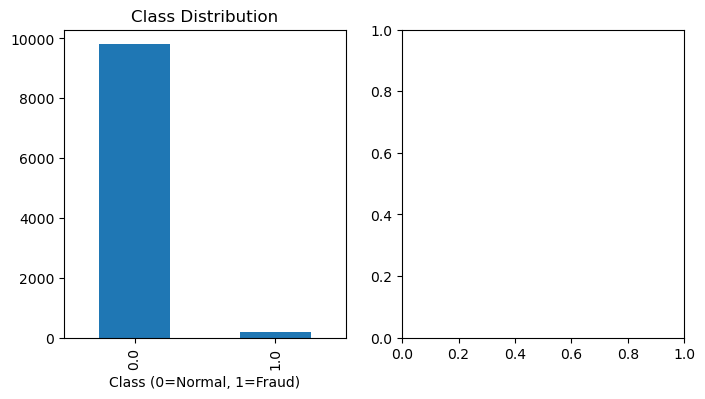

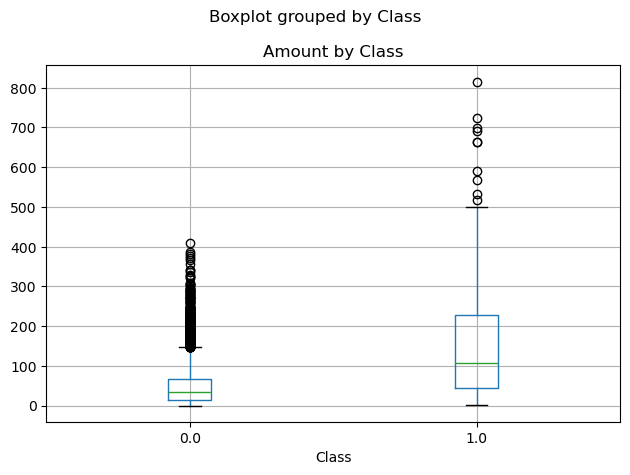

In [3]:
# Step 3: Exploratory Data Analysis
print("Class Distribution:")
print(df['Class'].value_counts())

# Plot class distribution
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
df['Class'].value_counts().plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Class (0=Normal, 1=Fraud)')

plt.subplot(1, 2, 2)
df.boxplot(column='Amount', by='Class')
plt.title('Amount by Class')
plt.tight_layout()
plt.show()

In [4]:
# Step 4: Data Preprocessing
# Separate features and target
X = df.drop('Class', axis=1)
y = df['Class']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training set shape: {X_train_scaled.shape}")
print(f"Test set shape: {X_test_scaled.shape}")
print(f"Training fraud rate: {y_train.mean():.3f}")

Training set shape: (8000, 7)
Test set shape: (2000, 7)
Training fraud rate: 0.020


In [5]:
# Step 5: Logistic Regression Model
lr_model = LogisticRegression(random_state=42, class_weight='balanced')
lr_model.fit(X_train_scaled, y_train)

# Predictions
lr_pred = lr_model.predict(X_test_scaled)

# Evaluation
print("=== LOGISTIC REGRESSION RESULTS ===")
print(f"Accuracy: {accuracy_score(y_test, lr_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, lr_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, lr_pred))

=== LOGISTIC REGRESSION RESULTS ===
Accuracy: 0.8720

Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.87      0.93      1960
         1.0       0.11      0.78      0.19        40

    accuracy                           0.87      2000
   macro avg       0.55      0.82      0.56      2000
weighted avg       0.98      0.87      0.92      2000


Confusion Matrix:
[[1713  247]
 [   9   31]]


In [6]:
# Step 6: Decision Tree Model
dt_model = DecisionTreeClassifier(random_state=42, class_weight='balanced', max_depth=10)
dt_model.fit(X_train, y_train)

# Predictions
dt_pred = dt_model.predict(X_test)

# Evaluation
print("=== DECISION TREE RESULTS ===")
print(f"Accuracy: {accuracy_score(y_test, dt_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, dt_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, dt_pred))

=== DECISION TREE RESULTS ===
Accuracy: 0.9470

Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.96      0.97      1960
         1.0       0.18      0.45      0.25        40

    accuracy                           0.95      2000
   macro avg       0.58      0.70      0.61      2000
weighted avg       0.97      0.95      0.96      2000


Confusion Matrix:
[[1876   84]
 [  22   18]]


In [7]:
# Step 7: Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)

# Predictions
rf_pred = rf_model.predict(X_test)

# Evaluation
print("=== RANDOM FOREST RESULTS ===")
print(f"Accuracy: {accuracy_score(y_test, rf_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, rf_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, rf_pred))

=== RANDOM FOREST RESULTS ===
Accuracy: 0.9815

Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      1960
         1.0       0.67      0.15      0.24        40

    accuracy                           0.98      2000
   macro avg       0.82      0.57      0.62      2000
weighted avg       0.98      0.98      0.98      2000


Confusion Matrix:
[[1957    3]
 [  34    6]]


Feature Importance:
  feature  importance
2      V1    0.466208
0  Amount    0.206459
5      V4    0.073703
3      V2    0.068202
6      V5    0.068014
4      V3    0.059822
1    Time    0.057592


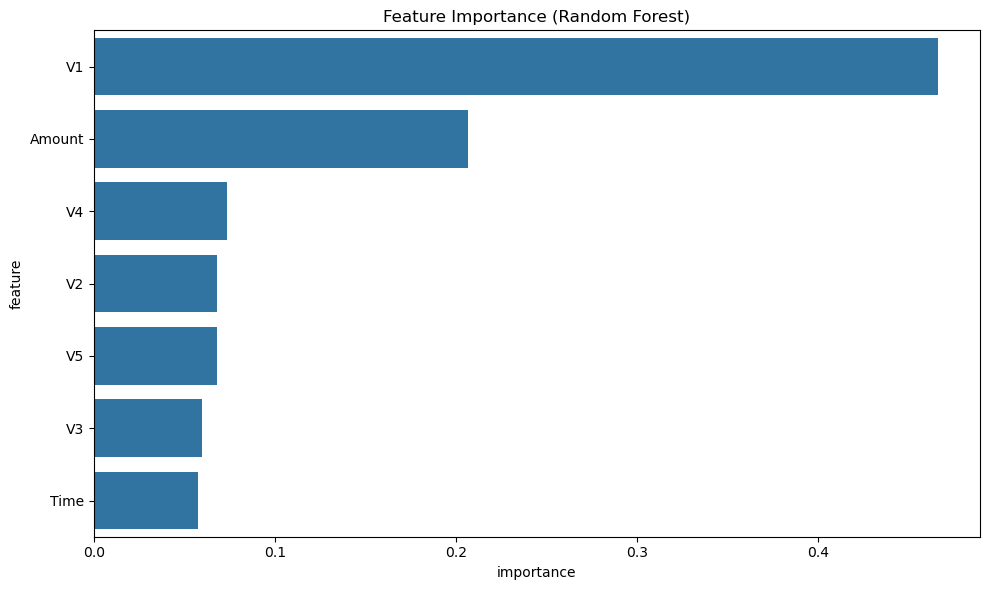

In [8]:
# Step 8: Feature Importance (Random Forest)
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("Feature Importance:")
print(feature_importance)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='importance', y='feature')
plt.title('Feature Importance (Random Forest)')
plt.tight_layout()
plt.show()

Model Performance Comparison:
                 Model  Accuracy
0  Logistic Regression    0.8720
1        Decision Tree    0.9470
2        Random Forest    0.9815


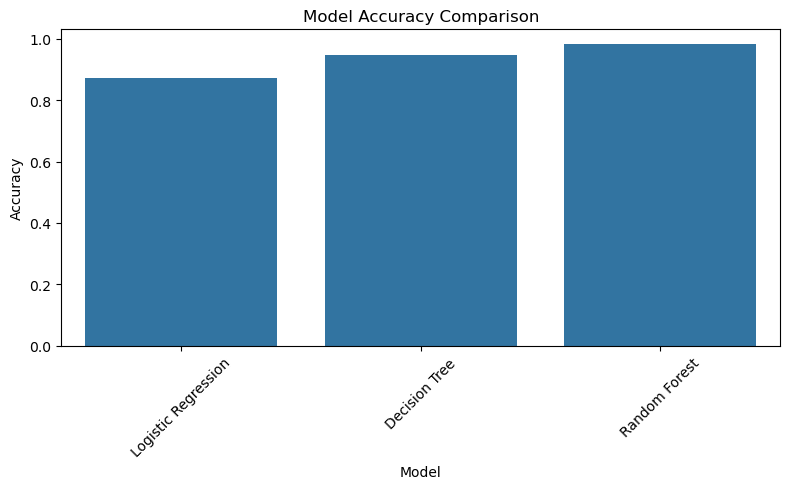

In [9]:
# Step 9: Model Comparison
models_performance = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest'],
    'Accuracy': [
        accuracy_score(y_test, lr_pred),
        accuracy_score(y_test, dt_pred),
        accuracy_score(y_test, rf_pred)
    ]
})

print("Model Performance Comparison:")
print(models_performance)

# Plot comparison
plt.figure(figsize=(8, 5))
sns.barplot(data=models_performance, x='Model', y='Accuracy')
plt.title('Model Accuracy Comparison')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [10]:
# Step 10: Fraud Detection Function
def detect_fraud(amount, time, v1, v2, v3, v4, v5, model='rf'):
    """Predict if a transaction is fraudulent"""
    # Create input array
    input_data = np.array([[amount, time, v1, v2, v3, v4, v5]])
    
    # Choose model
    if model == 'lr':
        input_scaled = scaler.transform(input_data)
        prediction = lr_model.predict(input_scaled)[0]
        probability = lr_model.predict_proba(input_scaled)[0][1]
    elif model == 'dt':
        prediction = dt_model.predict(input_data)[0]
        probability = dt_model.predict_proba(input_data)[0][1]
    else:  # Random Forest
        prediction = rf_model.predict(input_data)[0]
        probability = rf_model.predict_proba(input_data)[0][1]
    
    return prediction, probability

# Test the function
print("Testing Fraud Detection Function:")
print("\nNormal Transaction:")
pred, prob = detect_fraud(50, 12000, 0.1, -0.2, 0.3, -0.1, 0.2)
print(f"Prediction: {'FRAUD' if pred == 1 else 'NORMAL'}, Probability: {prob:.4f}")

print("\nSuspicious Transaction:")
pred, prob = detect_fraud(500, 3600, 3.5, 2.1, -1.8, 2.3, -2.1)
print(f"Prediction: {'FRAUD' if pred == 1 else 'NORMAL'}, Probability: {prob:.4f}")

Testing Fraud Detection Function:

Normal Transaction:
Prediction: NORMAL, Probability: 0.0000

Suspicious Transaction:
Prediction: NORMAL, Probability: 0.1700


c:\Users\aksha\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\aksha\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\aksha\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\aksha\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
